Equipo 38 proyecto integrador Avance 1

## Integrantes

**Rubén Marcos Ramos Guerrero - A01793131**

**Edgar Lopez Valdes - A01339939**

**Eddie Guadalupe Elorza Ruiz- A01793547**


---
### Antecedente
Después de la reunión con el Doctor Ricardo Ramírez, el 4 de mayo de 2024, se acordó que debido a que el alcance del proyecto incluye la recopilación de datos para reentrenamiento, es complicado realizar un análisis completo de los mismos.

El proceso incluye recopilar audios tanto negativos como positivos para el caso de la frase "Hola TecBot" y analizar brevemente los patrones en las ondas de sonido, para tratar de encontrar algunos patrones.

In [ ]:
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import os
import numpy as np

A continuación se muestra la transcripción de los audios de cada caso, para visualizar realmente los contenidos de cada archivo.

In [12]:
folder_paths = ['Audios/HolaCasoNegativo', 'Audios/HolaTecBot']
file_names = []
transcriptions = []

for folder_path in folder_paths:
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.aifc'):
            file_names.append(os.path.join(folder_path, file_name))
            if file_name == 'Audio4.aifc':
                transcriptions.append('hola Josu')
            elif file_name == 'Audio8.aifc':
                transcriptions.append('Hola Dabot')
            else:
                transcriptions.append('Hola TecBot')
# Crear DataFrame con los datos
data = pd.DataFrame({'File_Name': file_names, 'Transcription': transcriptions})

# Mostrar registros
print(data)

                              File_Name Transcription
0   Audios/HolaCasoNegativo/Audio4.aifc     hola Josu
1   Audios/HolaCasoNegativo/Audio8.aifc    Hola Dabot
2         Audios/HolaTecBot/Audio9.aifc   Hola TecBot
3         Audios/HolaTecBot/Audio5.aifc   Hola TecBot
4         Audios/HolaTecBot/Audio3.aifc   Hola TecBot
5        Audios/HolaTecBot/Audio12.aifc   Hola TecBot
6         Audios/HolaTecBot/Audio2.aifc   Hola TecBot
7        Audios/HolaTecBot/Audio11.aifc   Hola TecBot
8         Audios/HolaTecBot/Audio1.aifc   Hola TecBot
9        Audios/HolaTecBot/Audio10.aifc   Hola TecBot
10        Audios/HolaTecBot/Audio7.aifc   Hola TecBot
11        Audios/HolaTecBot/Audio6.aifc   Hola TecBot


In [13]:
# Función para graficar la forma de onda de un archivo de audio
def plot_waveform(audio_path):
    data, sr = sf.read(audio_path)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title('Forma de onda de {}'.format(audio_path))
    plt.show()

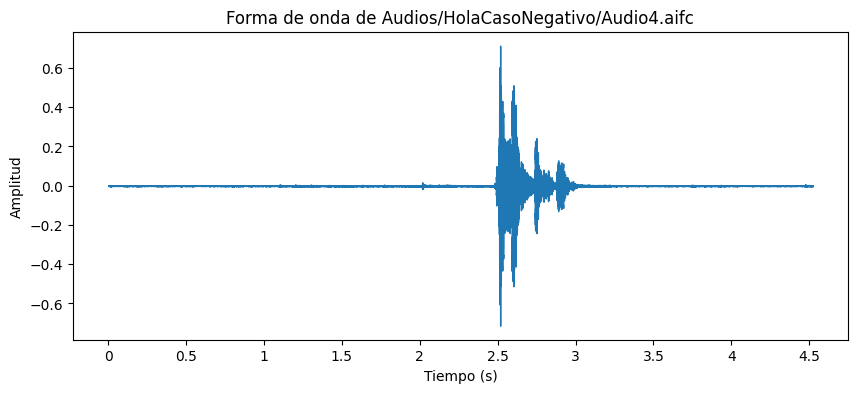

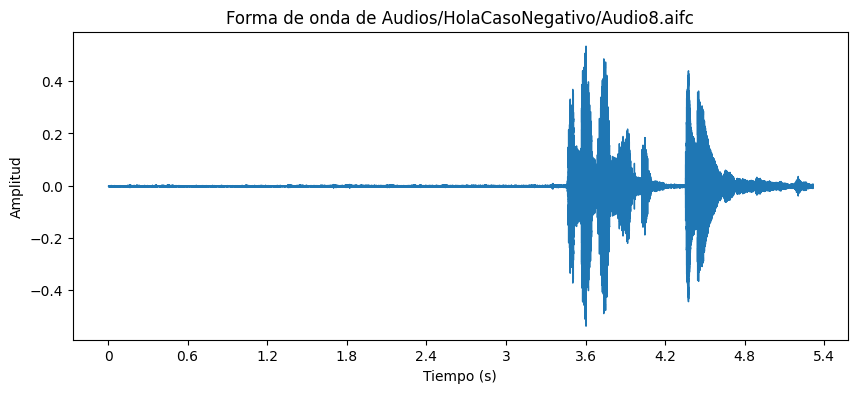

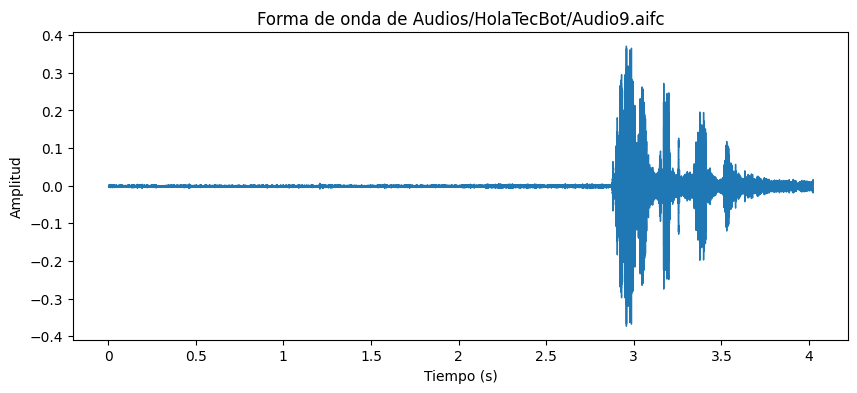

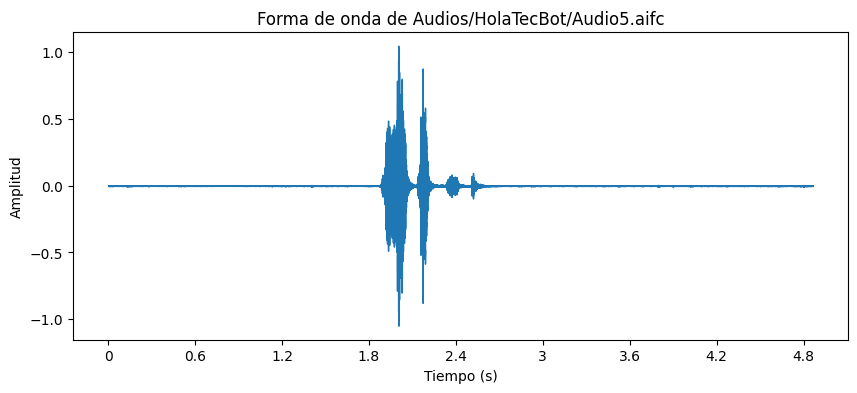

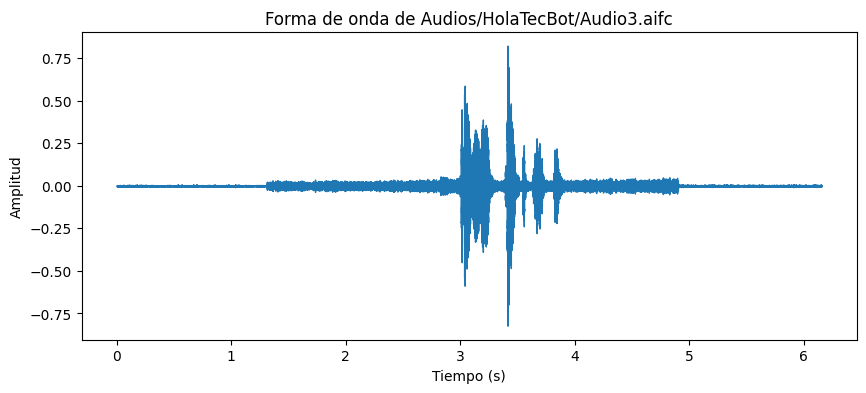

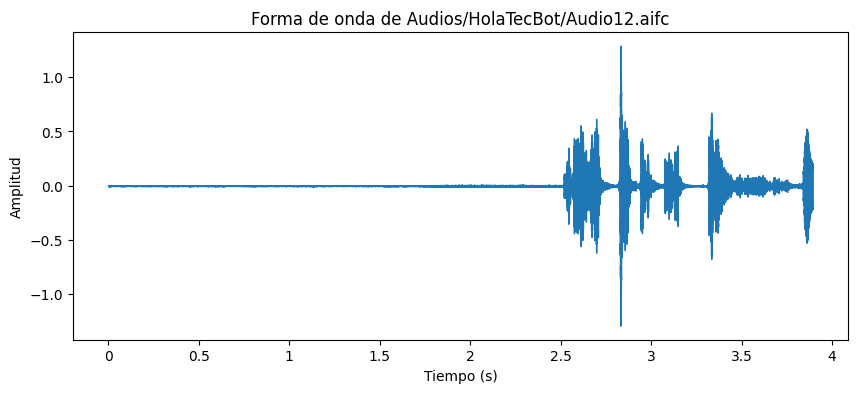

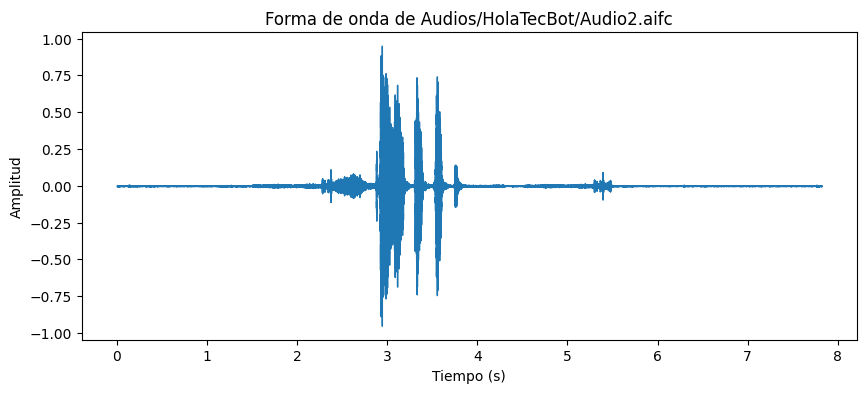

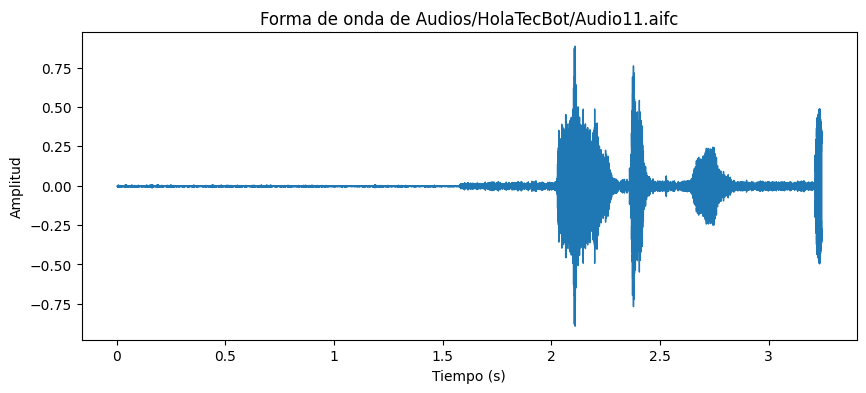

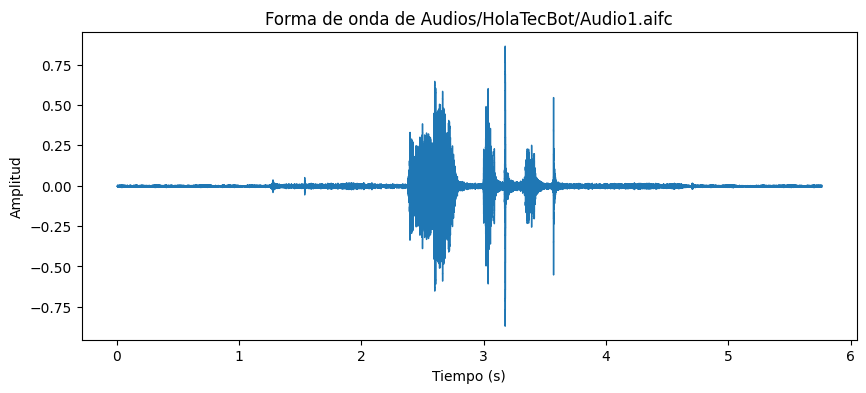

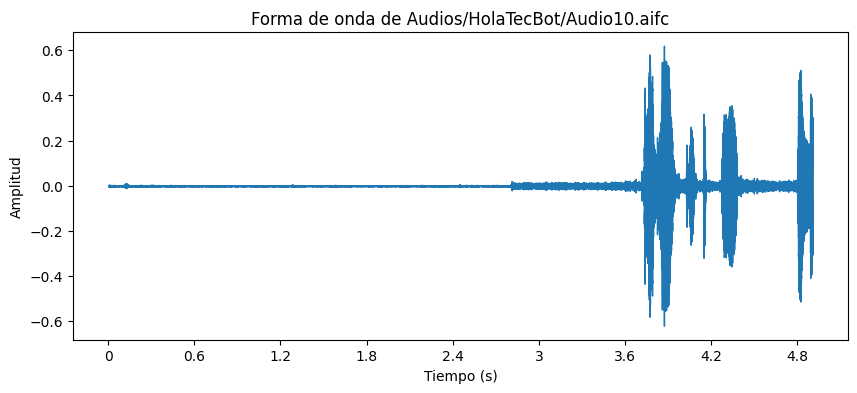

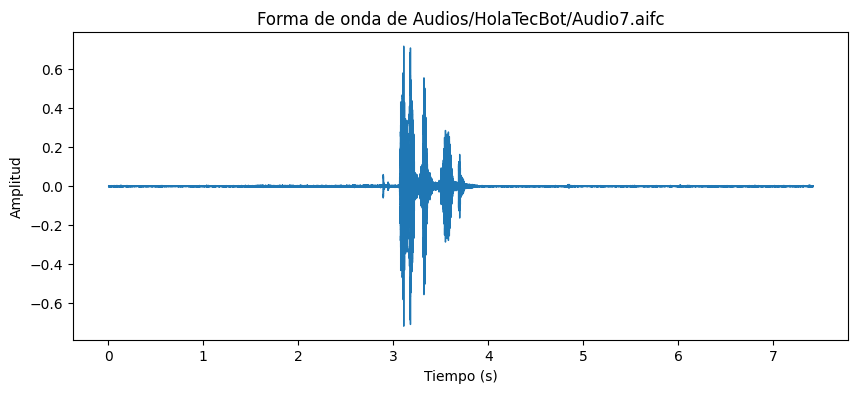

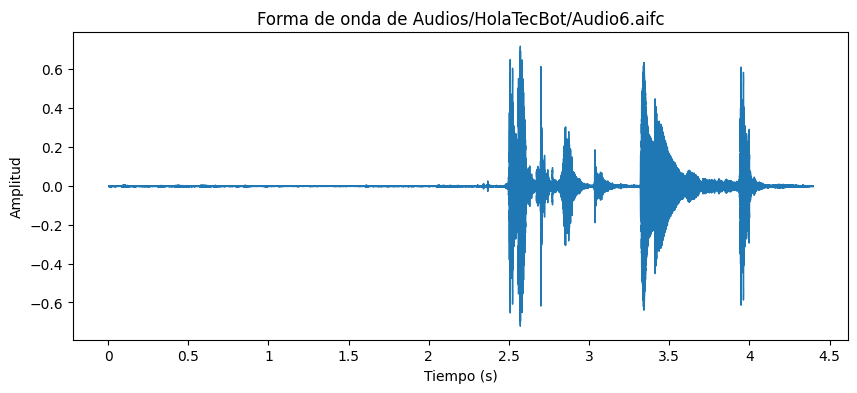

In [22]:
# Graficar la forma de onda de cada archivo de audio
for file_name in file_names:
    plot_waveform(file_name)

In [15]:
durations = []
for file_name in file_names:
    data, sr = sf.read(file_name)
    duration = len(data) / sr
    durations.append(duration)

In [16]:
durations

[4.522666666666667,
 5.312,
 4.021333333333334,
 4.864,
 6.1546666666666665,
 3.8933333333333335,
 7.818666666666667,
 3.2426666666666666,
 5.76,
 4.906666666666666,
 7.413333333333333,
 4.394666666666667]

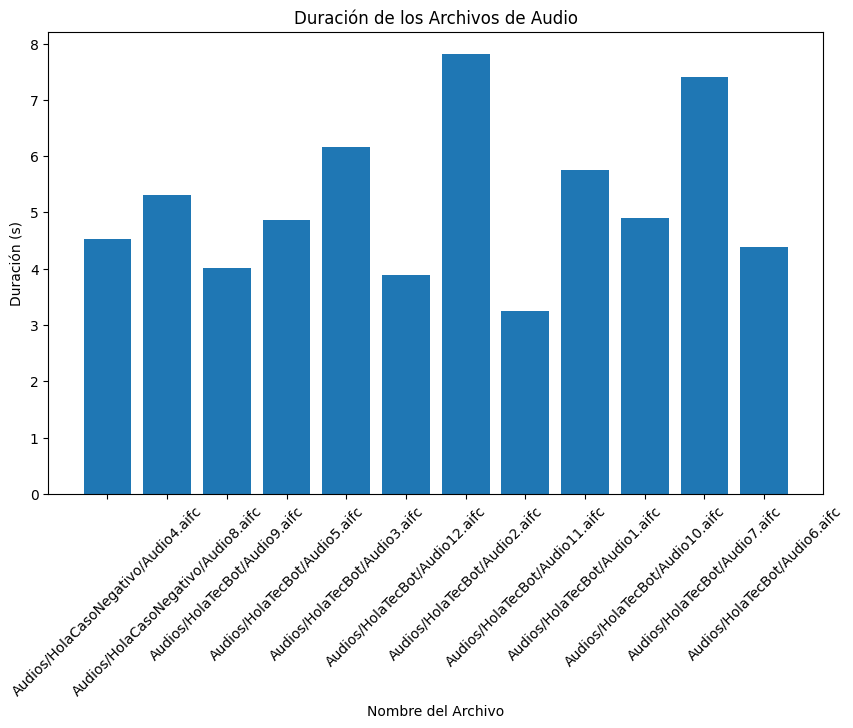

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(file_names)), durations)
plt.xticks(range(len(file_names)), file_names, rotation=45)
plt.xlabel('Nombre del Archivo')
plt.ylabel('Duración (s)')
plt.title('Duración de los Archivos de Audio')
plt.show()

In [18]:
#Funcion para remover silencios de 2 o mas segundos
#Aun por probar
def remove_silence(audio_path, threshold=0.01, min_silence=2):
    y, sr = librosa.load(audio_path, sr=None)
    energy = librosa.feature.rms(y=y)

    silence_starts = np.where(energy < threshold)[1]
    silence_starts = np.insert(silence_starts, 0, 0)
    silence_ends = silence_starts[1:] - 1
    silence_starts = silence_starts[:-1]
    silence_durations = silence_ends - silence_starts + 1

    segments_to_keep = np.where(silence_durations < sr * min_silence)[0]
    audio_cleaned = np.concatenate([y[s:e+1] for s, e in zip(silence_starts[segments_to_keep], silence_ends[segments_to_keep])])

    return audio_cleaned, sr